In [164]:
pd.set_option('display.max_rows',60)

In [165]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of parking lot names
parkings = [
    'alto-dos-moinhos', 'belem', 'casal-vistoso', 'chao-do-loureiro', 'rego', 'alcantara',
    'ameixoeira', 'condominio-graca', 'sousa-pinto', 'lumiar', 'telheiras-poente',
    'campo-das-cebolas', 'graca', 'manuel-gouveia', 'correia-teles-campo-de-ourique',
    'avenida-de-padua', 'cosme-damiao', 'universidade', 'portas-do-sol', 'parque-mayer',
    'estrada-da-luz', 'avenida-lusiada', 'calcada-do-combro', 'combatentes',
    'colegio-militar', 'campo-grande', 'areeiro'
]

# Request headers to simulate a browser
headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36" }

# Base URL
base_url = "https://www.emel.pt/pt/parques/"

# List to store all DataFrames
all_dfs = []

# Loop through parking lots
for parking in parkings:
    # Construct the complete URL using the individual parking lot name
    url = f"{base_url}{parking}/"
    print(f"Fetching URL: {url}")

    # HTTP request to get the page content
    response = requests.get(url, headers=headers)

    # Check the status code of the response
    if response.status_code == 200:
        # Parse the page content
        soup = BeautifulSoup(response.content, "html.parser")

        # Find the table with class 'classic'
        tarifario_section = soup.find('table', class_='classic')

        # Check if the table was found
        if tarifario_section:
            rows = []
            # Extract rows from the table
            for tr in tarifario_section.find_all('tr'):
                cols = tr.find_all('td')
                if len(cols) == 2:
                    description = cols[0].get_text(strip=True)
                    price = cols[1].get_text(strip=True)
                    rows.append([description, price])

            # Create DataFrame with the extracted data
            df = pd.DataFrame(rows, columns=['Description', 'Price'])
            df['Parking'] = parking  # Added column with parking lot name
            all_dfs.append(df)
        else:
            print(f"Table not found for parking: {parking}")
    else:
        print(f"Failed to fetch URL: {url} (Status code: {response.status_code})")

# Concatenate all DataFrames into a single DataFrame
if all_dfs:
    final_df = pd.concat(all_dfs, ignore_index=True)
    print("Parking Rates")
    print(final_df)
else:
    print("No data was collected.")


Fetching URL: https://www.emel.pt/pt/parques/alto-dos-moinhos/
Fetching URL: https://www.emel.pt/pt/parques/belem/
Fetching URL: https://www.emel.pt/pt/parques/casal-vistoso/
Fetching URL: https://www.emel.pt/pt/parques/chao-do-loureiro/
Fetching URL: https://www.emel.pt/pt/parques/rego/
Fetching URL: https://www.emel.pt/pt/parques/alcantara/
Fetching URL: https://www.emel.pt/pt/parques/ameixoeira/
Fetching URL: https://www.emel.pt/pt/parques/condominio-graca/
Fetching URL: https://www.emel.pt/pt/parques/sousa-pinto/
Fetching URL: https://www.emel.pt/pt/parques/lumiar/
Fetching URL: https://www.emel.pt/pt/parques/telheiras-poente/
Fetching URL: https://www.emel.pt/pt/parques/campo-das-cebolas/
Fetching URL: https://www.emel.pt/pt/parques/graca/
Fetching URL: https://www.emel.pt/pt/parques/manuel-gouveia/
Fetching URL: https://www.emel.pt/pt/parques/correia-teles-campo-de-ourique/
Fetching URL: https://www.emel.pt/pt/parques/avenida-de-padua/
Fetching URL: https://www.emel.pt/pt/parques

In [166]:
pd.set_option('display.max_rows', 164)
print(final_df)

# Optionally, reset the option to default behavior after viewing
pd.reset_option('display.max_rows')

                       Description     Price                         Parking
0    Mínimo a pagar até 15 minutos     0,40€                alto-dos-moinhos
1                       30 Minutos     0,60€                alto-dos-moinhos
2                           1 hora     1,00€                alto-dos-moinhos
3                          2 horas     2,00€                alto-dos-moinhos
4                          3 horas     3,00€                alto-dos-moinhos
5                          4 horas     4,00€                alto-dos-moinhos
6                    Máximo Diário       10€                alto-dos-moinhos
7                   Até 15 minutos     0,50€                           belem
8                           1 hora     1,00€                           belem
9                          2 horas     2,00€                           belem
10                         3 horas     3,80€                           belem
11                         4 horas     5,60€                           belem

In [167]:
final_df['Parking'].value_counts()

Parking
portas-do-sol                     9
cosme-damiao                      8
alto-dos-moinhos                  7
correia-teles-campo-de-ourique    6
campo-grande                      6
colegio-militar                   6
combatentes                       6
calcada-do-combro                 6
avenida-lusiada                   6
estrada-da-luz                    6
parque-mayer                      6
universidade                      6
avenida-de-padua                  6
manuel-gouveia                    6
belem                             6
graca                             6
campo-das-cebolas                 6
telheiras-poente                  6
lumiar                            6
sousa-pinto                       6
ameixoeira                        6
alcantara                         6
rego                              6
chao-do-loureiro                  6
casal-vistoso                     6
areeiro                           6
condominio-graca                  2
Name: count, dtype: 

In [168]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  164 non-null    object
 1   Price        164 non-null    object
 2   Parking      164 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB


In [169]:
final_df['Price'].unique()

array(['0,40€', '0,60€', '1,00€', '2,00€', '3,00€', '4,00€', '10€',
       '0,50€', '3,80€', '5,60€', '30,80 €', '1,20€', '2,20€', '3,40€',
       '4,45€', '5,30€', '1,45€', '2,95€', '4,80€', '6,80€', '20€', '5€',
       '2,40€', '3,60€', '10,00€', '0,35€', '1,50€', '35,00€', '2,45€',
       '3,85€', '5,25€', '33,25€', '0,20€', '0,80€', '1,60€', '3,20€',
       '10,00 €', '4,50€', '6,00€', '25,00€', '0,25€', 'Gratuito', '',
       '1,10€', '2,35€', '2,60€', '135,00€', '99€', '40€', '50€', '37€',
       '24€', '110€', '74€', '1,25€', '3,75€', '5,20€', '33,20€',
       '23,40€', '24,80€', '2,90€', '4,70€', '6,65€', '13,05€'],
      dtype=object)

In [170]:
df2 = final_df

In [171]:
df2['Price'] = df2['Price'].replace({',':'.', 'Gratuito':'0', " ":""}, regex=True)
df2['Price'].unique()

array(['0.40€', '0.60€', '1.00€', '2.00€', '3.00€', '4.00€', '10€',
       '0.50€', '3.80€', '5.60€', '30.80€', '1.20€', '2.20€', '3.40€',
       '4.45€', '5.30€', '1.45€', '2.95€', '4.80€', '6.80€', '20€', '5€',
       '2.40€', '3.60€', '10.00€', '0.35€', '1.50€', '35.00€', '2.45€',
       '3.85€', '5.25€', '33.25€', '0.20€', '0.80€', '1.60€', '3.20€',
       '4.50€', '6.00€', '25.00€', '0.25€', '0', '', '1.10€', '2.35€',
       '2.60€', '135.00€', '99€', '40€', '50€', '37€', '24€', '110€',
       '74€', '1.25€', '3.75€', '5.20€', '33.20€', '23.40€', '24.80€',
       '2.90€', '4.70€', '6.65€', '13.05€'], dtype=object)

In [172]:
df2['Price'] = df2['Price'].replace({'€':''}, regex=True)
df2['Price'].unique()

array(['0.40', '0.60', '1.00', '2.00', '3.00', '4.00', '10', '0.50',
       '3.80', '5.60', '30.80', '1.20', '2.20', '3.40', '4.45', '5.30',
       '1.45', '2.95', '4.80', '6.80', '20', '5', '2.40', '3.60', '10.00',
       '0.35', '1.50', '35.00', '2.45', '3.85', '5.25', '33.25', '0.20',
       '0.80', '1.60', '3.20', '4.50', '6.00', '25.00', '0.25', '0', '',
       '1.10', '2.35', '2.60', '135.00', '99', '40', '50', '37', '24',
       '110', '74', '1.25', '3.75', '5.20', '33.20', '23.40', '24.80',
       '2.90', '4.70', '6.65', '13.05'], dtype=object)

In [173]:
df2.drop(99, inplace=True)

In [174]:
pd.set_option('display.max_rows', 164)
print(df2)

                       Description   Price                         Parking
0    Mínimo a pagar até 15 minutos    0.40                alto-dos-moinhos
1                       30 Minutos    0.60                alto-dos-moinhos
2                           1 hora    1.00                alto-dos-moinhos
3                          2 horas    2.00                alto-dos-moinhos
4                          3 horas    3.00                alto-dos-moinhos
5                          4 horas    4.00                alto-dos-moinhos
6                    Máximo Diário      10                alto-dos-moinhos
7                   Até 15 minutos    0.50                           belem
8                           1 hora    1.00                           belem
9                          2 horas    2.00                           belem
10                         3 horas    3.80                           belem
11                         4 horas    5.60                           belem
12                   Máxi

In [175]:
df2['Price'] = df2['Price'].astype(float)
df2['Price'].value_counts()

Price
0.40      11
2.00       9
10.00      8
2.40       7
0.50       7
1.20       6
2.60       6
1.00       5
3.20       5
1.60       5
0.35       5
3.00       4
0.80       4
2.45       4
4.00       3
2.35       3
1.10       3
0.20       3
1.25       3
3.75       3
1.50       3
4.45       3
4.80       3
2.20       3
3.40       3
5.30       3
5.20       3
35.00      2
1.45       2
3.60       2
37.00      2
24.80      1
74.00      1
6.65       1
33.20      1
23.40      1
110.00     1
24.00      1
50.00      1
40.00      1
2.90       1
4.70       1
99.00      1
33.25      1
135.00     1
5.00       1
3.80       1
5.60       1
30.80      1
2.95       1
6.80       1
20.00      1
3.85       1
0.00       1
5.25       1
0.60       1
4.50       1
6.00       1
25.00      1
0.25       1
13.05      1
Name: count, dtype: int64

In [176]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 0 to 163
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  163 non-null    object 
 1   Price        163 non-null    float64
 2   Parking      163 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.1+ KB


In [177]:
df2['Description'].value_counts()

Description
Máximo Diário                    24
1 hora                           23
2 horas                          23
3 horas                          23
4 horas                          23
Até 15 minutos                   15
Mínimo                            7
Residentes 24h                    2
Comerciantes 24h                  2
Noturna (20h00 às 08h00)          1
Perda de bilhete                  1
24h                               1
Diurna (08h00 às 20h00)           1
Mínimo a pagar até 15 minutos     1
Residentes Diurna                 1
Residentes Noturna                1
Comerciantes Diurna               1
3 H                               1
4 H                               1
5 Horas                           1
2 H                               1
1 H                               1
30 mins                           1
Minimo a pagar 15 minutos         1
30 Minutos                        1
4 Horas                           1
3 Horas                           1
2:01 Horas      

In [178]:
values_to_remove = ['Máximo Diário',
                    'Perda de bilhete',
                    'Residentes 24h',
                    'Comerciantes 24h',
                    'Noturna (20h00 às 08h00)',
                    '24h',
                    'Diurna (08h00 às 20h00)',
                    'Residentes Diurna',
                    'Residentes Noturna',
                    'Comerciantes Diurna',
                    'Comerciantes Noturna',
                    ]

In [179]:
df_filtered = df2[~df2['Description'].isin(values_to_remove)]

In [180]:
df_filtered_reset = df_filtered.reset_index(drop=True)
df_filtered_reset.head()

,Description,Price,Parking
0,Mínimo a pagar até 15 minutos,0.4,alto-dos-moinhos
1,30 Minutos,0.6,alto-dos-moinhos
2,1 hora,1.0,alto-dos-moinhos
3,2 horas,2.0,alto-dos-moinhos
4,3 horas,3.0,alto-dos-moinhos


In [181]:
df_filtered_reset['Description'].value_counts()

Description
1 hora                           23
2 horas                          23
3 horas                          23
4 horas                          23
Até 15 minutos                   15
Mínimo                            7
Mínimo a pagar até 15 minutos     1
Minimo a pagar 15 minutos         1
3 H                               1
2 H                               1
1 H                               1
30 mins                           1
2:01 Horas                        1
5 Horas                           1
4 Horas                           1
3 Horas                           1
30 Minutos                        1
Até 2 Horas                       1
4 H                               1
Name: count, dtype: int64

In [182]:
replacement_dict = {
    '1 hora': '60',
    '2 horas': '120',
    '3 horas': '180',
    '4 horas': '240',
    'Até 15 minutos': '15',
    'Mínimo': '15',
    'Mínimo a pagar até 15 minutos': '15',
    'Minimo a pagar 15 minutos': '15',
    '3 H': '180',
    '2 H': '120',
    '1 H': '60',
    '30 mins': '30',
    '2:01 Horas': '120',
    '5 Horas': '300',
    '4 Horas': '240',
    '3 Horas': '180',
    '30 Minutos': '30',
    'Até 2 Horas': '120',
    '4 H': '240'
}

# Substituir valores na coluna 'Description'
df_filtered_reset['Description'] = df_filtered_reset['Description'].replace(replacement_dict, regex=False)

In [183]:
df_filtered_reset['Description'] = df_filtered_reset['Description'].astype(float)

In [184]:
df_filtered_reset['Description'] = pd.to_numeric(df_filtered_reset['Description'], errors='coerce')
df_filtered_reset['Price'] = pd.to_numeric(df_filtered_reset['Price'], errors='coerce')

In [185]:
df_emel = df_filtered_reset

In [186]:
grouped = df_emel.groupby('Parking').agg({
    'Price': 'sum',
    'Description': 'sum'
}).reset_index()

# Calcular a média de preço por minuto
grouped['Price per Minute'] = grouped['Price'] / grouped['Description']

# Exibir o DataFrame resultante com a média de preço por minuto
print(grouped)

                           Parking  Price  Description  Price per Minute
0                        alcantara  12.50        615.0          0.020325
1                 alto-dos-moinhos  11.00        645.0          0.017054
2                       ameixoeira   5.35        615.0          0.008699
3                          areeiro  11.65        615.0          0.018943
4                 avenida-de-padua  11.20        960.0          0.011667
5                  avenida-lusiada  13.05        615.0          0.021220
6                            belem  12.90        615.0          0.020976
7                calcada-do-combro  16.20        615.0          0.026341
8                campo-das-cebolas  15.50        615.0          0.025203
9                     campo-grande   8.40        615.0          0.013659
10                   casal-vistoso  11.65        615.0          0.018943
11                chao-do-loureiro  16.50        615.0          0.026829
12                 colegio-militar   8.40        61

In [187]:
df_emel['Price per Minute'] = df_emel['Price'] / df_emel['Description']
df_emel.head(7)

,Description,Price,Parking,Price per Minute
0,15.0,0.4,alto-dos-moinhos,0.026667
1,30.0,0.6,alto-dos-moinhos,0.020000
2,60.0,1.0,alto-dos-moinhos,0.016667
3,120.0,2.0,alto-dos-moinhos,0.016667
4,180.0,3.0,alto-dos-moinhos,0.016667
5,240.0,4.0,alto-dos-moinhos,0.016667
6,15.0,0.5,belem,0.033333


In [188]:
replacement_name_dict = {
    'combatentes': 'Combatentes',
    'calcada-do-combro': 'Calçada do Combro',
    'avenida-de-padua': 'LIDL Av. Inf. D. Henrique',
    'graca': 'Parque da Graça',
    'estrada-da-luz': 'Estrada da Luz',
    'campo-grande': 'Campo Grande',
    'manuel-gouveia': 'Manuel Gouveia',
    'chao-do-loureiro': 'Chão do Loureiro',
    'rego': 'Rego',
    'universidade': 'Universidade',
    'avenida-lusiada': 'Avenida Lusíada',
    'parque-mayer': 'Parque Mayer',
    'belem': 'Belém',
    'cosme-damiao': 'Cosme Damião',
    'lumiar': 'Lumiar',
    'campo-das-cebolas': 'Campo das Cebolas',
    'sousa-pinto': 'Sousa Pinto',
    'telheiras-poente': 'Telheiras Nascente',
    'areeiro': 'Areeiro',
    'ameixoeira': 'Ameixoeira',
    'alcantara': 'Alcântara',
    'casal-vistoso': 'Casal Vistoso',
    'alto-dos-moinhos': 'Alto dos Moinhos',
    'correia-teles-campo-de-ourique': 'Campo de Ourique',
    'colegio-militar': 'Colégio Militar',
    
}

# Substituir valores na coluna 'Description'
df_emel['Parking'] = df_emel['Parking'].replace(replacement_name_dict, regex=False)

In [189]:
df_emel

,Description,Price,Parking,Price per Minute
0,15.0,0.40,Alto dos Moinhos,0.026667
1,30.0,0.60,Alto dos Moinhos,0.020000
2,60.0,1.00,Alto dos Moinhos,0.016667
3,120.0,2.00,Alto dos Moinhos,0.016667
4,180.0,3.00,Alto dos Moinhos,0.016667
5,240.0,4.00,Alto dos Moinhos,0.016667
6,15.0,0.50,Belém,0.033333
7,60.0,1.00,Belém,0.016667
8,120.0,2.00,Belém,0.016667
9,180.0,3.80,Belém,0.021111


In [190]:
average_price_per_minute = df_emel.groupby('Parking')['Price per Minute'].mean()
average_price_per_minute

Parking
Alcântara                    0.022667
Alto dos Moinhos             0.018889
Ameixoeira                   0.011333
Areeiro                      0.020486
Avenida Lusíada              0.022083
Belém                        0.022222
Calçada do Combro            0.027097
Campo Grande                 0.016444
Campo das Cebolas            0.026667
Campo de Ourique             0.014000
Casal Vistoso                0.020486
Chão do Loureiro             0.027417
Colégio Militar              0.016444
Combatentes                  0.020486
Cosme Damião                 0.013333
Estrada da Luz               0.022083
LIDL Av. Inf. D. Henrique    0.010667
Lumiar                       0.013333
Manuel Gouveia               0.011333
Parque Mayer                 0.022083
Parque da Graça              0.013333
Rego                         0.018667
Sousa Pinto                  0.022069
Telheiras Nascente           0.021333
Universidade                 0.016444
Name: Price per Minute, dtype: float64

In [191]:
import matplotlib.pyplot as plt

In [192]:
average_price_per_minute = average_price_per_minute.sort_values()

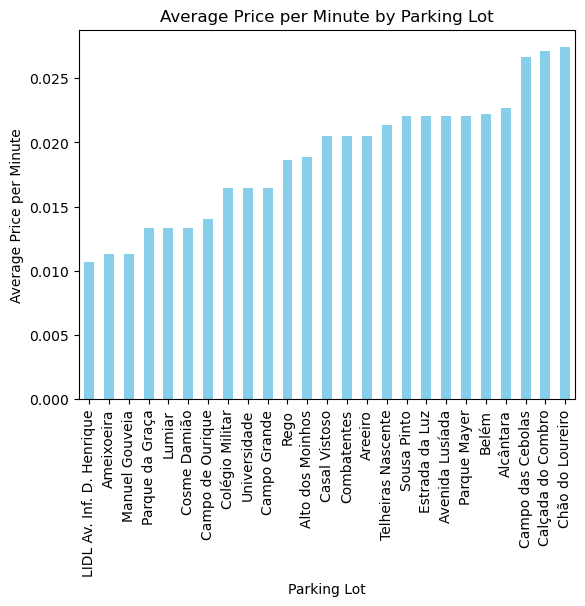

In [193]:
average_price_per_minute.plot(kind='bar', color='skyblue')
plt.title('Average Price per Minute by Parking Lot')
plt.ylabel('Average Price per Minute')
plt.xlabel('Parking Lot')
plt.xticks(rotation=90)
plt.show()

C:\Users\marce\AppData\Local\Temp\ipykernel_14952\1778445275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_per_minute.index, y=average_price_per_minute.values, palette='coolwarm')


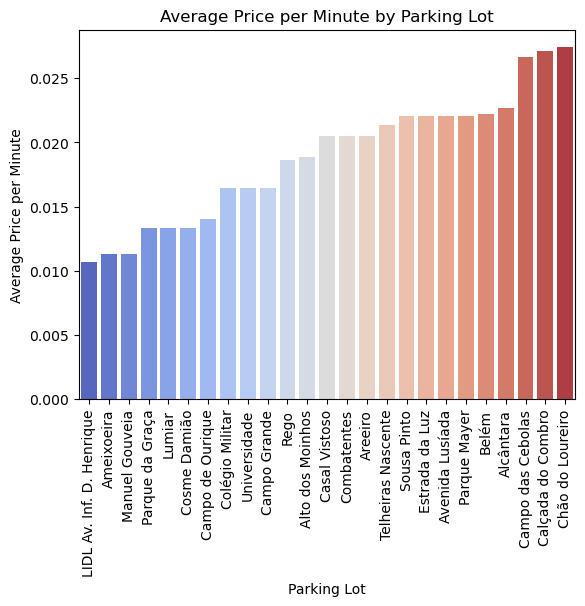

In [194]:
import seaborn as sns

# Create the plot with seaborn
sns.barplot(x=average_price_per_minute.index, y=average_price_per_minute.values, palette='coolwarm')
plt.title('Average Price per Minute by Parking Lot')
plt.ylabel('Average Price per Minute')
plt.xlabel('Parking Lot')
plt.xticks(rotation=90)
plt.show()

In [195]:
average_price_per_minute = df_emel.groupby('Parking')['Price per Minute'].mean()

df_average_price_per_minute = average_price_per_minute.reset_index()

df_average_price_per_minute.columns = ['Parking', 'Average Price per Minute']

df_average_price_per_minute

,Parking,Average Price per Minute
0,Alcântara,0.022667
1,Alto dos Moinhos,0.018889
2,Ameixoeira,0.011333
3,Areeiro,0.020486
4,Avenida Lusíada,0.022083
5,Belém,0.022222
6,Calçada do Combro,0.027097
7,Campo Grande,0.016444
8,Campo das Cebolas,0.026667
9,Campo de Ourique,0.014000


In [197]:
df_average_price_per_minute.to_csv('average_price_per_minute.csv', index=False)